In [2]:
import sqlite3
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import pyecharts
import pyecharts.options as opts

from pyecharts.charts import Line
from pyecharts.charts import Bar
from pyecharts.charts import Pie

In [3]:
conn = sqlite3.connect('taobao.db')
cur = conn.cursor()
print('database open success!')

database open success!


## 行為統計

In [4]:
sql = '''
    SELECT CASE WHEN behavior_type = '1' THEN '點擊' 
                WHEN behavior_type = '2' THEN '收藏' 
                WHEN behavior_type = '3' THEN '加購物車' 
                ELSE '支付' 
                END AS 行為,
           count( * ) AS 次數
      FROM behavior
     GROUP BY behavior_type;
'''
behavior_count= []

for row in cur.execute(sql):
    behavior_count.append(row)
    
df_behavior_count = pd.DataFrame(behavior_count, columns=['行為', '次數'])

def percentage(x):
    behavior_percentage = (x/ x.sum())*100
    behavior_percentage = round(behavior_percentage, 3)
    df_behavior_count['percentage'] = behavior_percentage
    return df_behavior_count
percentage(df_behavior_count['次數'])

,行為,次數,percentage
0,點擊,987911,94.215
1,收藏,20997,2.002
2,加購物車,29427,2.806
3,支付,10240,0.977


In [5]:
(
    Pie()
    .add("", [list(z) for z in zip(df_behavior_count['行為'], df_behavior_count['percentage'])])
    .set_global_opts(title_opts=opts.TitleOpts(title="Pie-基本示例"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}%")) 
).render('pie.html')

'/Users/yanghaoyu/side_project/taobao/pie.html'

## 雙12單日的用戶行為

In [6]:
sql = '''
    SELECT CASE WHEN behavior_type = '1' THEN '點擊' 
                WHEN behavior_type = '2' THEN '收藏' 
                WHEN behavior_type = '3' THEN '加購物車' 
                ELSE '支付' 
                END AS 行為,
           count(behavior_type) AS 次數
      FROM behavior
     WHERE strftime('%Y-%m-%d', datetime) = '2014-12-12'
     GROUP BY behavior_type;

'''
behavior12_count= []

for row in cur.execute(sql):
    behavior12_count.append(row)
    
df_behavior12_count = pd.DataFrame(behavior12_count, columns=['行為', '次數'])

def percentage(x):
    behavior_percentage = (x/ x.sum())*100
    behavior_percentage = round(behavior_percentage, 3)
    df_behavior12_count['percentage'] = behavior_percentage
    return df_behavior12_count
percentage(df_behavior12_count['次數'])

,行為,次數,percentage
0,點擊,54992,92.693
1,收藏,914,1.541
2,加購物車,2130,3.590
3,支付,1291,2.176


In [7]:
(
    Pie()
    .add("", [list(z) for z in zip(df_behavior_count['行為'], df_behavior_count['percentage'])])
    .set_global_opts(title_opts=opts.TitleOpts(title="Pie-基本示例"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}%")) 
).render('pie12.html')

'/Users/yanghaoyu/side_project/taobao/pie12.html'

## PV UV

In [8]:
sql = '''
        SELECT uv.date, pv.pv, uv.uv FROM
        (SELECT strftime('%Y-%m-%d', datetime) AS date, count(behavior_type) AS pv
            FROM behavior
            WHERE behavior_type = '1'
            GROUP BY date) AS pv,
        (
            SELECT date, count(*) AS uv FROM(
                    SELECT strftime('%Y-%m-%d', datetime) AS date, user_id
                    FROM behavior
                    GROUP BY date, user_id
                    ORDER BY date)
            GROUP BY date
        ) AS uv
        WHERE pv.date = uv.date
'''

pvuv = []
for row in cur.execute(sql):
    pvuv.append(row)
    
df_pvuv = pd.DataFrame(pvuv, columns=['date', 'pv', 'uv'])
df_pvuv.head(5)

,date,pv,uv
0,2014-11-18,29802,4283
1,2014-11-19,28723,4301
2,2014-11-20,28798,4276
3,2014-11-21,26403,4144
4,2014-11-22,29538,4122


In [9]:
sql = '''
        SELECT uv.date, pv.pv, uv.uv FROM
        (SELECT strftime('%Y-%m-%d', datetime) AS date, count(behavior_type) AS pv
            FROM behavior
            WHERE behavior_type = '1'
            GROUP BY date) AS pv,
        (
            SELECT date, count(*) AS uv FROM(
                    SELECT strftime('%Y-%m-%d', datetime) AS date, user_id
                    FROM behavior
                    GROUP BY date, user_id
                    ORDER BY date)
            GROUP BY date
        ) AS uv
        WHERE pv.date = uv.date
'''

pvuv = []
for row in cur.execute(sql):
    pvuv.append(row)
    
df_pvuv = pd.DataFrame(pvuv, columns=['date', 'pv', 'uv'])
df_pvuv.head(5)

,date,pv,uv
0,2014-11-18,29802,4283
1,2014-11-19,28723,4301
2,2014-11-20,28798,4276
3,2014-11-21,26403,4144
4,2014-11-22,29538,4122


In [35]:
# from pyecharts.charts import Line
date = list(df_pvuv['date'])
pv = list(df_pvuv['pv'])
uv = list(df_pvuv['uv'])
(
    Line(init_opts=opts.InitOpts(width="1300px", height="600px"))
    .add_xaxis(xaxis_data=date)
    .add_yaxis(
        series_name="pv",
        y_axis=pv,
        markpoint_opts=opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(type_="max", name="最大值"),
            ]
        ),
#         markline_opts=opts.MarkLineOpts(
#             data=[opts.MarkLineItem(type_="average", name="平均值")]
#         ),
    )
    .add_yaxis(
        series_name="uv",
        y_axis=uv,
        markpoint_opts=opts.MarkPointOpts(
            data=[
                    opts.MarkPointItem(type_="max", name="最大值"),
            ]
        ),
#         markline_opts=opts.MarkLineOpts(
#             data=[
#                 opts.MarkLineItem(type_="average", name="平均值"),
#                 opts.MarkLineItem(symbol="none", x="100%", y="max"),
#                 opts.MarkLineItem(symbol="circle", type_="max", name="最高点"),
#             ]
#         ),
     )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="pv&uv", subtitle='x軸-時間, y軸-pv&uv次數', pos_left=50),
        tooltip_opts=opts.TooltipOpts(trigger="axis"),
        toolbox_opts=opts.ToolboxOpts(is_show=True),
        xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
    )
    .render('pv&uv.html')
#     .render_notebook()
)

'/Users/yanghaoyu/side_project/taobao/pv&uv.html'

## 用戶是否會於雙12前幾日開始有累積購物車的行為

In [11]:
sql = '''
    SELECT cart_behavior.date as date,
           count( * ) AS add_cart_behavior
      FROM (
               SELECT user_id,
                      item_id,
                      item_category,
                      strftime('%Y-%m-%d', datetime) AS date
                 FROM behavior
                WHERE behavior_type = '3'
           )
           AS cart_behavior
     GROUP BY date
     ORDER BY cart_behavior.date;
'''
add_cart_before12 = []

for row in cur.execute(sql):
    add_cart_before12.append(row)
    
df_add_cart_before12 = pd.DataFrame(add_cart_before12, columns=['日期', '加入購物車次數'])
df_add_cart_before12

,日期,加入購物車次數
0,2014-11-18,866
1,2014-11-19,880
2,2014-11-20,877
3,2014-11-21,778
4,2014-11-22,854
5,2014-11-23,850
6,2014-11-24,858
7,2014-11-25,886
8,2014-11-26,812
9,2014-11-27,861


In [24]:
# from pyecharts.charts import Line
date = list(df_add_cart_before12['日期'])
add_cart = list(df_add_cart_before12['加入購物車次數'])
(
    Line(init_opts=opts.InitOpts(width="1300px", height="600px"))
    .add_xaxis(xaxis_data=date)
    .add_yaxis(
        series_name="加入購物車行為",
        y_axis=add_cart,
        markpoint_opts=opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(type_="max", name="最大值"),
            ]
        ),
        markline_opts=opts.MarkLineOpts(
            data=[opts.MarkLineItem(type_="average", name="平均值")]
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="用戶是否會於雙12前幾日開始有累積購物車的行為", pos_left=65),
        tooltip_opts=opts.TooltipOpts(trigger="axis"),
        toolbox_opts=opts.ToolboxOpts(is_show=True),
        xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
    )
    .render('add_cart.html')
#     .render_notebook()
)

'/Users/yanghaoyu/side_project/taobao/add_cart.html'

## 時段的行為統計

In [12]:
sql = '''
    SELECT STRFTIME('%H', datetime) AS hour,
           CASE WHEN behavior_type = '1' THEN 'view' WHEN behavior_type = '2' THEN 'collect' WHEN behavior_type = '3' THEN 'cart' ELSE 'buy' END AS 用戶行為,
           count(behavior_type) AS 次數
      FROM behavior
     GROUP BY hour,
              behavior_type;
'''
hour_behavior = []

for row in cur.execute(sql):
    hour_behavior.append(row)
    
df_hour_behavior = pd.DataFrame(hour_behavior, columns=['小時', '用戶行為', '次數'])
df_hour_behavior.head(5)

,小時,用戶行為,次數
0,00,view,42145
1,00,collect,954
2,00,cart,1219
3,00,buy,456
4,01,view,22120


In [13]:
view = df_hour_behavior[df_hour_behavior['用戶行為'] == 'view'][['小時', '次數']]
collect = df_hour_behavior[df_hour_behavior['用戶行為'] == 'collect'][['小時', '次數']]
cart = df_hour_behavior[df_hour_behavior['用戶行為'] == 'cart'][['小時', '次數']]
buy = df_hour_behavior[df_hour_behavior['用戶行為'] == 'buy'][['小時', '次數']]

In [14]:
hour = list(view['小時'])
view_count = list(view['次數'])
collect_count = list(collect['次數'])
cart_count = list(cart['次數'])
buy_count = list(buy['次數'])

In [15]:
(
    Line()
    .add_xaxis(hour)
    .add_yaxis('view', y_axis=view_count)
    .add_yaxis('collect', y_axis=collect_count)
    .add_yaxis('cart', y_axis=cart_count)
    .add_yaxis('buy', y_axis=buy_count)
    .set_global_opts(title_opts=opts.TitleOpts(title='不同時間點-用戶行為', subtitle='x軸-時間, y軸-行為發生次數'))
).render('不同時間點-用戶行為.html')

'/Users/yanghaoyu/side_project/taobao/不同時間點-用戶行為.html'

In [16]:
# from pyecharts.charts import Line
(
    Line()
    .add_xaxis(hour)
    .add_yaxis('collect', y_axis=collect_count)
    .add_yaxis('cart', y_axis=cart_count)
    .add_yaxis('buy', y_axis=buy_count)
    .set_global_opts(title_opts=opts.TitleOpts(title='不同時間點-用戶行為', subtitle='x軸-時間, y軸-行為發生次數'))
).render('不同時間點-用戶行為細部.html')

'/Users/yanghaoyu/side_project/taobao/不同時間點-用戶行為細部.html'

## 每日購買數

In [37]:
sql = '''
    SELECT STRFTIME('%Y-%m-%d', datetime) AS date,
           count(behavior_type) AS 購買次數
      FROM behavior
     WHERE behavior_type = '4'
     GROUP BY date,
              behavior_type;
'''
buy_behavior = []

for row in cur.execute(sql):
    buy_behavior.append(row)
    
df_buy_behavior = pd.DataFrame(buy_behavior, columns=['日期', '購買行為次數'])
df_buy_behavior.head(5)

,日期,購買行為次數
0,2014-11-18,314
1,2014-11-19,322
2,2014-11-20,293
3,2014-11-21,242
4,2014-11-22,299


In [42]:
# from pyecharts.charts import Line
day = list(df_buy_behavior['日期'])
buy_count = list(df_buy_behavior['購買行為次數'])
(
    Line()
    .add_xaxis(day)
    .add_yaxis('buy', y_axis=buy_count)
    .set_global_opts(title_opts=opts.TitleOpts(title='每日購買數', subtitle='x軸-時間, y軸-購買量', pos_left=40))
).render('每日購買數.html')

'/Users/yanghaoyu/side_project/taobao/每日購買數.html'

## 累計購買次數統計

In [19]:
sql = '''
    SELECT count( * ) AS 次數
      FROM behavior
     WHERE behavior_type = '4'
     GROUP BY user_id;
'''
buy_count= []

for row in cur.execute(sql):
    buy_count.append(row)
    
df_buy_count = pd.DataFrame(buy_count, columns=['次數'])
df_buy_count.head(5)

,次數
0,3
1,2
2,2
3,4
4,1


/Users/yanghaoyu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanghaoyu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanghaoyu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanghaoyu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0, flags=flags)


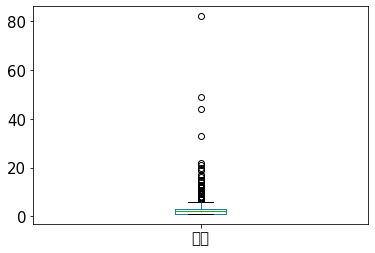

In [20]:
boxplot = df_buy_count.boxplot(column=['次數'], rot=0, grid = False, fontsize=15)

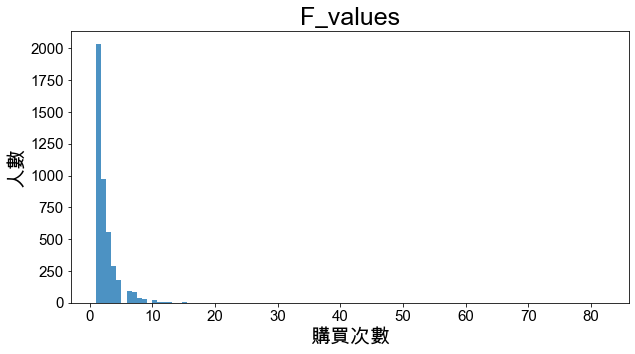

In [77]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

plt.figure()
ax = df_buy_count['次數'].plot.hist(bins=100, alpha=0.8, figsize=(10,5), fontsize=15)
ax.set_title('F_values', fontsize=25)
ax.set_xlabel("購買次數", fontsize=20)
ax.set_ylabel("人數", fontsize=20)
plt.savefig('累計購買次數.png', dpi=100)

In [25]:
sql = '''
    SELECT user_id,
           strftime('%Y-%m-%d', datetime) AS date
      FROM behavior;
'''
recency= []

for row in cur.execute(sql):
    recency.append(row)
    
df_recency = pd.DataFrame(recency, columns=['user_id', 'date'])
df_recency.head(5)

,user_id,date
0,98047837,2014-12-06
1,97726136,2014-12-09
2,98607707,2014-12-18
3,98662432,2014-12-06
4,98145908,2014-12-16


In [32]:
df_recency['date'] = pd.to_datetime(df_recency['date'])
r = (pd.to_datetime('2014-12-19') - df_recency.groupby('user_id')['date'].max()).dt.days

In [43]:
r.sort_values(ascending=False)

user_id
7409910      31
117489231    31
62989125     31
12093186     31
93492827     30
             ..
26529364      1
26509398      1
26460336      1
26438512      1
99989881      1
Name: date, Length: 8477, dtype: int64

In [80]:
r.describe()

count    8477.000000
mean        3.006960
std         3.986832
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        31.000000
Name: date, dtype: float64

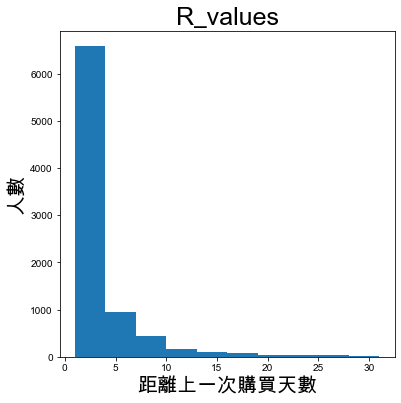

In [76]:
plt.figure(figsize=(6, 6))
plt.hist(r)
plt.title("R_values", fontsize=25)
# plt.set_xlabel('購買次數')
plt.xlabel("距離上一次購買天數", fontsize=20)
plt.ylabel("人數", fontsize=20)
plt.savefig('r_value.png')